## Thực hiện đọc dữ liệu trên HDFS
Dữ liệu được lưu trữ trên HDFS, chúng ta cần sử dụng PySpark để đọc và xử lý. 

In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from IPython.display import Image


In [ ]:


spark1 = SparkSession.builder \
    .appName("Stock_price_analysis") \
    .master("spark://spark-master:7077") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") \
    .getOrCreate()


In [3]:
df = spark1.read.csv("hdfs://namenode:9000/data/FPT.csv", header=True, inferSchema=True)
df.show(5)

+----------+----+----+----+-----+------+
|      time|open|high| low|close|volume|
+----------+----+----+----+-----+------+
|2015-01-05|7.34|7.37|7.28| 7.31|273550|
|2015-01-06|7.27|7.36|7.24| 7.36|364050|
|2015-01-07|7.36|7.51|7.36|  7.4|405560|
|2015-01-08|7.39| 7.4|7.31| 7.33|227300|
|2015-01-09|7.33|7.42|7.33| 7.39|320210|
+----------+----+----+----+-----+------+
only showing top 5 rows



In [4]:
print(spark1.sparkContext.master)
print(spark1.sparkContext.uiWebUrl)


spark://spark-master:7077
http://0efa63cae4da:4040


Ta có thể truy cập vào web ui của SparkMaster để xem thông tin của chương trình đang chạy

Đọc dữ liệu từ HDFS để bắt đầu phân tích


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Stock_price_analysis") \
    .master("spark://spark-master:7077") \
    .getOrCreate()

sc = spark.sparkContext


In [6]:
sc.getConf().getAll()

[('spark.app.name', 'Stock_price_analysis'),
 ('spark.hadoop.fs.defaultFS', 'hdfs://namenode:9000'),
 ('spark.app.submitTime', '1761112717956'),
 ('spark.executor.id', 'driver'),
 ('spark.app.id', 'app-20251022055839-0000'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.

Lấy dữ liệu từ các công ti có mã cổ phiếu khác nhau tiến hành phân tích

In [7]:
df_FLC = spark.read.csv("hdfs://namenode:9000/data/FLC.csv", header=True, inferSchema=True)
df_FPT = spark.read.csv("hdfs://namenode:9000/data/FPT.csv", header = True, inferSchema= True)
df_HPG = spark.read.csv("hdfs://namenode:9000/data/HPG.csv", header= True, inferSchema= True)
df_SSI = spark.read.csv("hdfs://namenode:9000/data/SSI.csv", header= True, inferSchema= True)
df_VCB = spark.read.csv("hdfs://namenode:9000/data/VCB.csv", header= True, inferSchema= True)
df_VNM = spark.read.csv("hdfs://namenode:9000/data/VNM.csv", header= True, inferSchema= True)

In [8]:
df_VCB.show(10)


+----------+-----+-----+-----+-----+-------+
|      time| open| high|  low|close| volume|
+----------+-----+-----+-----+-----+-------+
|2015-01-05| 9.32| 9.43| 9.23| 9.38| 310010|
|2015-01-06| 9.38| 9.99| 9.38| 9.99|1684600|
|2015-01-07|10.02|10.17| 9.73| 9.88|1430340|
|2015-01-08|  9.9|10.29| 9.88|10.17| 904240|
|2015-01-09|10.26|10.87|10.26|10.85|2286680|
|2015-01-12|10.87|11.11|10.79|10.93|3059730|
|2015-01-13|10.87|10.96|10.73|10.87|1496280|
|2015-01-14|10.82| 11.2|10.82|10.99|2338820|
|2015-01-15|10.93|11.11|10.82|10.82|1083780|
|2015-01-16|10.82|10.82|10.61|10.67| 678030|
+----------+-----+-----+-----+-----+-------+
only showing top 10 rows



Sau khi lấy được dữ liệu, ta thêm cột mean để tìm được giá trị trung bình để tìm giá trị cổ phiếu lớn nhất trong ngày

In [9]:
from pyspark.sql.functions import expr, col, column
df_FLCmean = df_FLC.withColumn("Mean", expr('(high  + low) / 2')).select("time", "Mean")
df_FPTmean = df_FPT.withColumn("Mean", expr('(high  + low) / 2')).select("time", "Mean")
df_HPGmean = df_HPG.withColumn("Mean", expr('(high + low) / 2')).select("time", "Mean")
df_SSImean = df_SSI.withColumn("Mean", expr('(high  + low) / 2')).select("time", "Mean")
df_VCBmean = df_VCB.withColumn("Mean", expr('(high + low)  / 2')).select("time", "Mean")
df_VNMmean = df_VNM.withColumn("Mean", expr('(high + low)  / 2')).select("time", "Mean")


In [10]:
df_FLCmean.show()

+----------+-----------------+
|      time|             Mean|
+----------+-----------------+
|2015-01-05|7.734999999999999|
|2015-01-06|            7.805|
|2015-01-07|7.914999999999999|
|2015-01-08|7.845000000000001|
|2015-01-09|             7.84|
|2015-01-12|            7.805|
|2015-01-13|7.664999999999999|
|2015-01-14|7.664999999999999|
|2015-01-15|7.845000000000001|
|2015-01-16|            8.055|
|2015-01-19|             7.88|
|2015-01-20|7.734999999999999|
|2015-01-21|             7.77|
|2015-01-22|             7.63|
|2015-01-23|7.699999999999999|
|2015-01-26|7.734999999999999|
|2015-01-27|7.595000000000001|
|2015-01-28|7.484999999999999|
|2015-01-29|7.484999999999999|
|2015-01-30|             7.52|
+----------+-----------------+
only showing top 20 rows



Để có thể trực quan hoá từ dữ liệu thành Biểu đồ theo dõi theo thời gian, ta nên đưa dữ liệu từ các dataframe về dạng pandas để có thể tiện sử dụng Matplotlib


In [11]:
pd_FLCmean = df_FLCmean.toPandas()
pd_FPTmean = df_FPTmean.toPandas()
pd_HPGmean = df_HPGmean.toPandas()
pd_SSImean = df_SSImean.toPandas()
pd_VCBmean = df_VCBmean.toPandas()
pd_VNMmean = df_VNMmean.toPandas()



In [12]:
import matplotlib.pyplot as plt


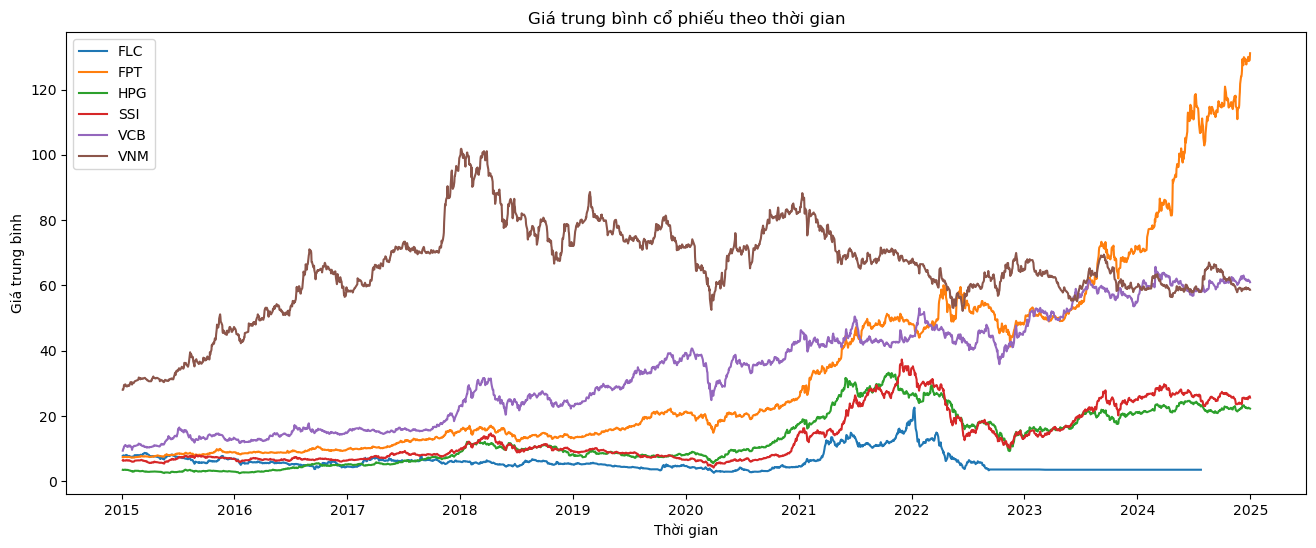

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.plot(pd_FLCmean['time'], pd_FLCmean['Mean'], label='FLC')
plt.plot(pd_FPTmean['time'], pd_FPTmean['Mean'], label='FPT')
plt.plot(pd_HPGmean['time'], pd_HPGmean['Mean'], label='HPG')
plt.plot(pd_SSImean['time'], pd_SSImean['Mean'], label='SSI')
plt.plot(pd_VCBmean['time'], pd_VCBmean['Mean'], label='VCB')
plt.plot(pd_VNMmean['time'], pd_VNMmean['Mean'], label='VNM')

plt.title("Giá trung bình cổ phiếu theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Giá trung bình")
plt.legend()
plt.grid(False)
plt.show()


Tiếp theo chúng ta có thể dùng biểu đồ đường để có thể theo dõi số lượng Volumes thể hiện sự quan tâm của mọi người đối với mã tương ứng

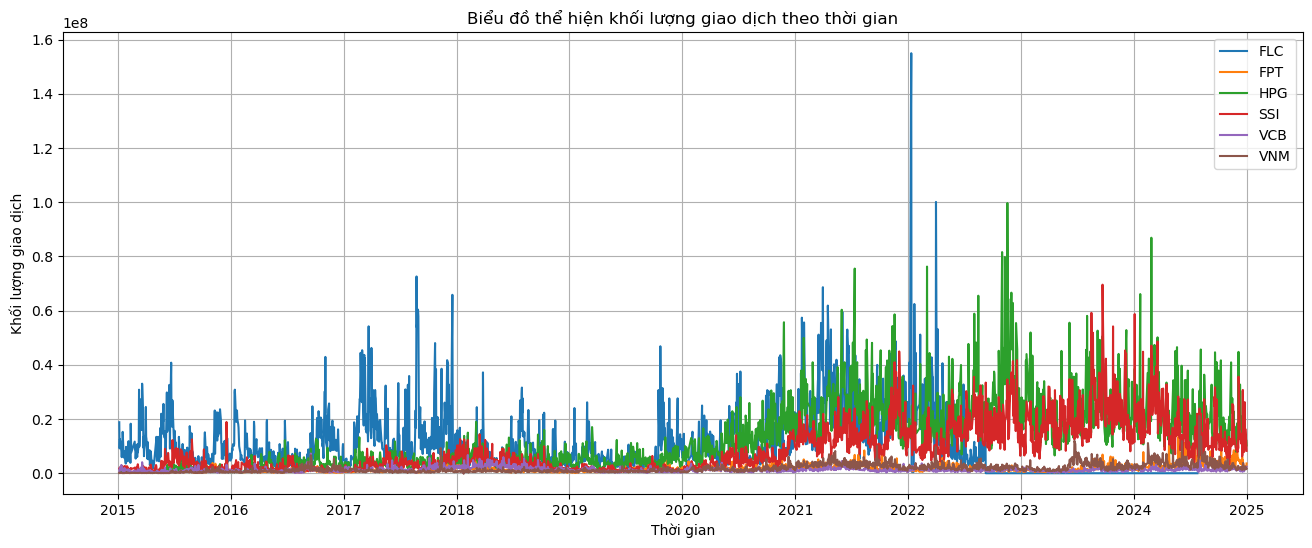

In [16]:
pd_FLC = df_FLC.toPandas()
pd_FPT = df_FPT.toPandas()
pd_HPG = df_HPG.toPandas()
pd_SSI = df_SSI.toPandas()
pd_VCB = df_VCB.toPandas()
pd_VNM = df_VNM.toPandas()
plt.figure(figsize=(16, 6))

plt.plot(pd_FLC['time'], pd_FLC['volume'], label = 'FLC')
plt.plot(pd_FPT['time'], pd_FPT['volume'], label = 'FPT')
plt.plot(pd_HPG['time'], pd_HPG['volume'], label = 'HPG')
plt.plot(pd_SSI['time'], pd_SSI['volume'], label = 'SSI')
plt.plot(pd_VCB['time'], pd_VCB['volume'], label = 'VCB')
plt.plot(pd_VNM['time'], pd_VNM['volume'], label = 'VNM')

plt.title("Biểu đồ thể hiện khối lượng giao dịch theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Khối lượng giao dịch")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd_data = {'FLC': pd_FLC, 'FPT': pd_FPT, 'HPG': pd_HPG, 'SSI': pd_SSI, 'VCB': pd_VCB, 'VNM': pd_VNM}
symbols = ['FLC', 'FPT', 'HPG', 'SSI', 'VCB', 'VNM']
pd_dataMean = {'FLC': pd_FLCmean, 'FPT': pd_FPTmean, 'HPG': pd_HPGmean, 'SSI': pd_SSImean, 'VCB': pd_VCBmean, 'VNM': pd_VNMmean}






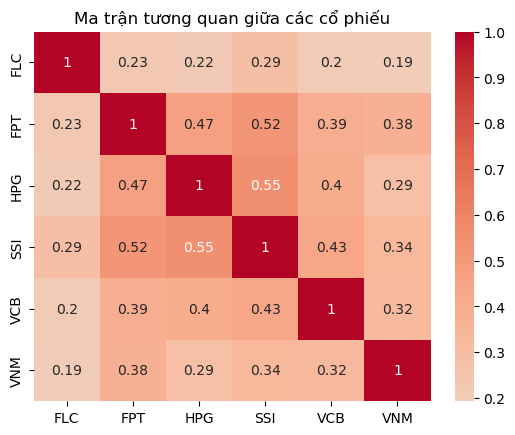

In [24]:
returns = pd.DataFrame({
    sym: pd_data[sym]['close'].pct_change() for sym in symbols
})
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Ma trận tương quan giữa các cổ phiếu")
plt.show()

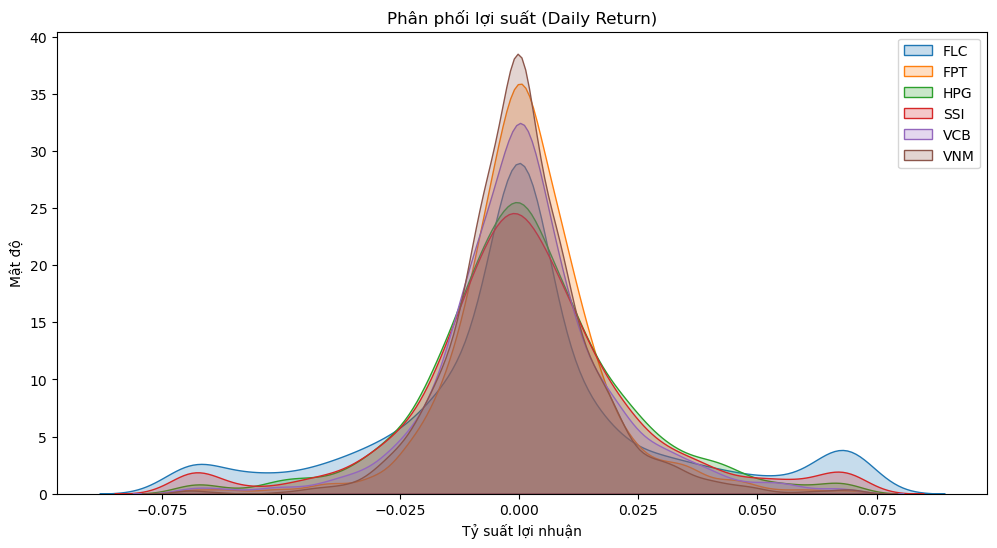

In [25]:
plt.figure(figsize=(12,6))
for sym in symbols:
    sns.kdeplot(pd_data[sym]['close'].pct_change(), label=sym, fill=True)
plt.title("Phân phối lợi suất (Daily Return)")
plt.xlabel("Tỷ suất lợi nhuận")
plt.ylabel("Mật độ")
plt.legend()
plt.show()

Ta đánh giá sự thay đổi cổ phiếu của các công ty trên theo ngày(%)

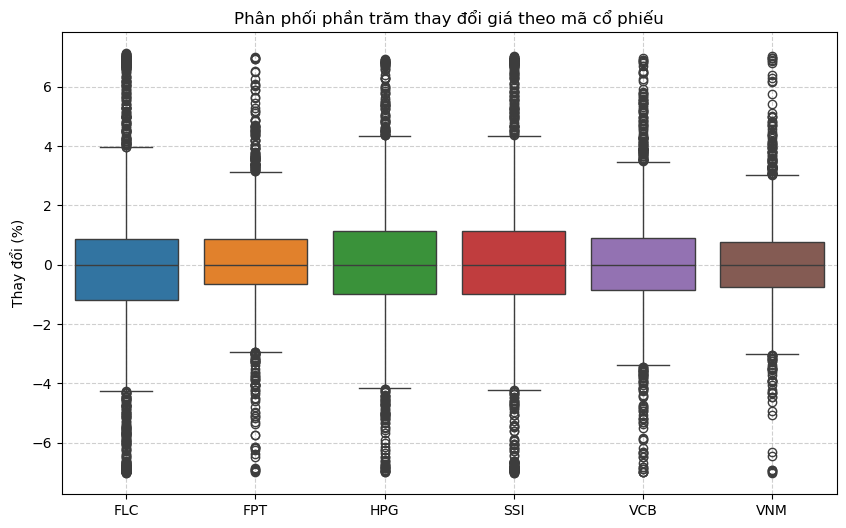

In [31]:
returns_df = pd.DataFrame({sym: pd_data[sym]['daily_change'] for sym in symbols})
plt.figure(figsize=(10,6))
sns.boxplot(data=returns_df)
plt.title("Phân phối phần trăm thay đổi giá theo mã cổ phiếu")
plt.ylabel("Thay đổi (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [32]:
spark1.stop()